### Project 1 - Shopping Trends

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Imports & Pre-Processing

In [2]:
shopping_df = pd.read_csv("shopping_trends_updated.csv")

In [3]:
print(shopping_df)

      Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2                        73  Massachusetts   

In [4]:
#null checking
shopping_dfnull = shopping_df.isnull()
print(shopping_dfnull)

      Customer ID    Age  Gender  Item Purchased  Category  \
0           False  False   False           False     False   
1           False  False   False           False     False   
2           False  False   False           False     False   
3           False  False   False           False     False   
4           False  False   False           False     False   
...           ...    ...     ...             ...       ...   
3895        False  False   False           False     False   
3896        False  False   False           False     False   
3897        False  False   False           False     False   
3898        False  False   False           False     False   
3899        False  False   False           False     False   

      Purchase Amount (USD)  Location   Size  Color  Season  Review Rating  \
0                     False     False  False  False   False          False   
1                     False     False  False  False   False          False   
2                    

In [5]:
#checking for duplicates
ids = shopping_df["Customer ID"]
shopping_df[ids.isin(ids[ids.duplicated()])].sort_values("Customer ID")

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases


In [6]:
#column checks
feature_names = shopping_df.columns
print(feature_names)

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')


In [7]:
season_counts = shopping_df['Season'].value_counts()
print(season_counts)

Season
Spring    999
Fall      975
Winter    971
Summer    955
Name: count, dtype: int64


In [8]:
color_counts = shopping_df['Color'].value_counts()
print(color_counts)

Color
Olive        177
Yellow       174
Silver       173
Teal         172
Green        169
Black        167
Cyan         166
Violet       166
Gray         159
Maroon       158
Orange       154
Charcoal     153
Pink         153
Blue         152
Magenta      152
Purple       151
Peach        149
Red          148
Beige        147
Indigo       147
Lavender     147
Turquoise    145
White        142
Brown        141
Gold         138
Name: count, dtype: int64


In [9]:
top_15_colors = color_counts.head(15)
print(top_15_colors)

Color
Olive       177
Yellow      174
Silver      173
Teal        172
Green       169
Black       167
Cyan        166
Violet      166
Gray        159
Maroon      158
Orange      154
Charcoal    153
Pink        153
Blue        152
Magenta     152
Name: count, dtype: int64


In [10]:
size_counts = shopping_df['Size'].value_counts()
print(size_counts)

Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64


In [11]:
category_counts = shopping_df['Category'].value_counts()
print(category_counts)

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64


In [12]:
df_fall = shopping_df[shopping_df['Season'] == 'Fall'][['Season', 'Item Purchased', 'Category', 'Purchase Amount (USD)', 'Color', 'Discount Applied', 'Customer ID']]
df_spring = shopping_df[shopping_df['Season'] == 'Spring'][['Season', 'Item Purchased', 'Category', 'Purchase Amount (USD)', 'Color', 'Discount Applied', 'Customer ID']]
df_summer = shopping_df[shopping_df['Season'] == 'Summer'][['Season', 'Item Purchased', 'Category', 'Purchase Amount (USD)', 'Color', 'Discount Applied', 'Customer ID']]
df_winter = shopping_df[shopping_df['Season'] == 'Winter'][['Season', 'Item Purchased', 'Category', 'Purchase Amount (USD)', 'Color', 'Discount Applied', 'Customer ID']]

### Sorting by Color & Season

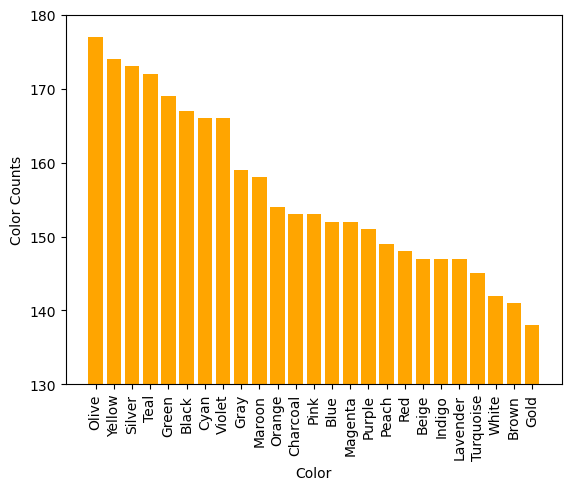

In [13]:
#popularity of colors over ALL seasons
plt.bar(color_counts.index, color_counts.values, color='orange', bottom=None, align='center', data=None)
plt.xlabel('Color')
plt.xticks(rotation=90)
plt.ylabel('Color Counts')
plt.ylim(130, 180)
plt.show()

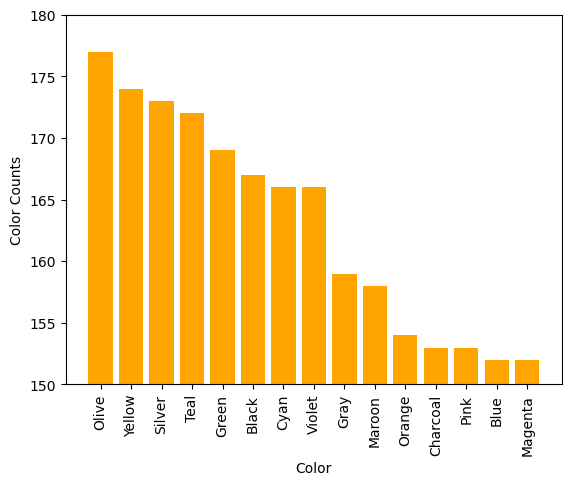

In [14]:
#popularity of top 10 colors over ALL seasons
plt.bar(top_15_colors.index, top_15_colors.values, color='orange', bottom=None, align='center', data=None)
plt.xlabel('Color')
plt.xticks(rotation=90)
plt.ylabel('Color Counts')
plt.ylim(150, 180)
plt.show()

In [15]:
fall_df = df_fall[['Season', 'Color']]
spring_df = df_spring[['Season', 'Color']]
summer_df = df_summer[['Season', 'Color']]
winter_df = df_winter[['Season', 'Color']]

Colors sorted by popularity seperately

In [16]:
fall_colors = fall_df['Color'].value_counts()
spring_colors = spring_df['Color'].value_counts()
summer_colors = summer_df['Color'].value_counts()
winter_colors = winter_df['Color'].value_counts()

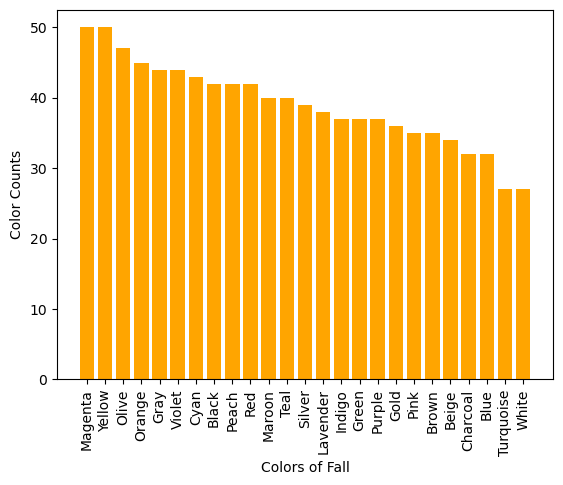

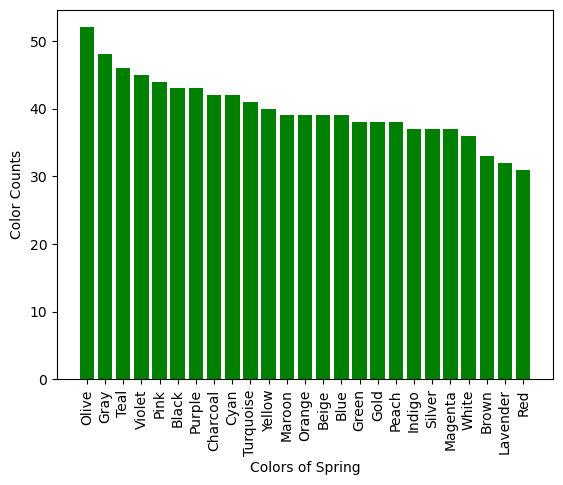

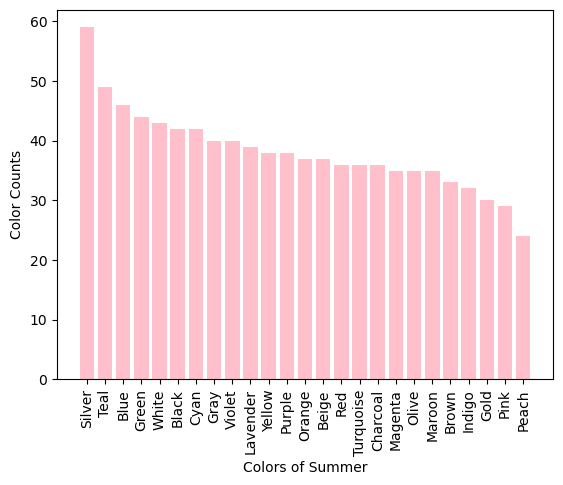

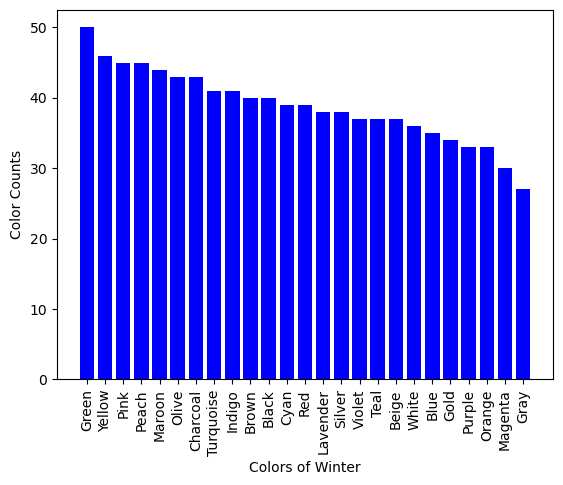

In [17]:
#fall_colors = fall_colors.sort_index()
#spring_colors = spring_colors.sort_index()
#summer_colors = summer_colors.sort_index()
#winter_colors = winter_colors.sort_index()

plt.bar(fall_colors.index, fall_colors.values, color='orange', bottom=None, align='center', data=None)
plt.xlabel('Colors of Fall')
plt.xticks(rotation=90)
plt.ylabel('Color Counts')
plt.show()
plt.bar(spring_colors.index, spring_colors.values, color='green', bottom=None, align='center', data=None)
plt.xlabel('Colors of Spring')
plt.xticks(rotation=90)
plt.ylabel('Color Counts')
plt.show()
plt.bar(summer_colors.index, summer_colors.values, color='pink', bottom=None, align='center', data=None)
plt.xlabel('Colors of Summer')
plt.xticks(rotation=90)
plt.ylabel('Color Counts')
plt.show()
plt.bar(winter_colors.index, winter_colors.values, color='blue', bottom=None, align='center', data=None)
plt.xlabel('Colors of Winter')
plt.xticks(rotation=90)
plt.ylabel('Color Counts')
plt.show()

top 15 colors 

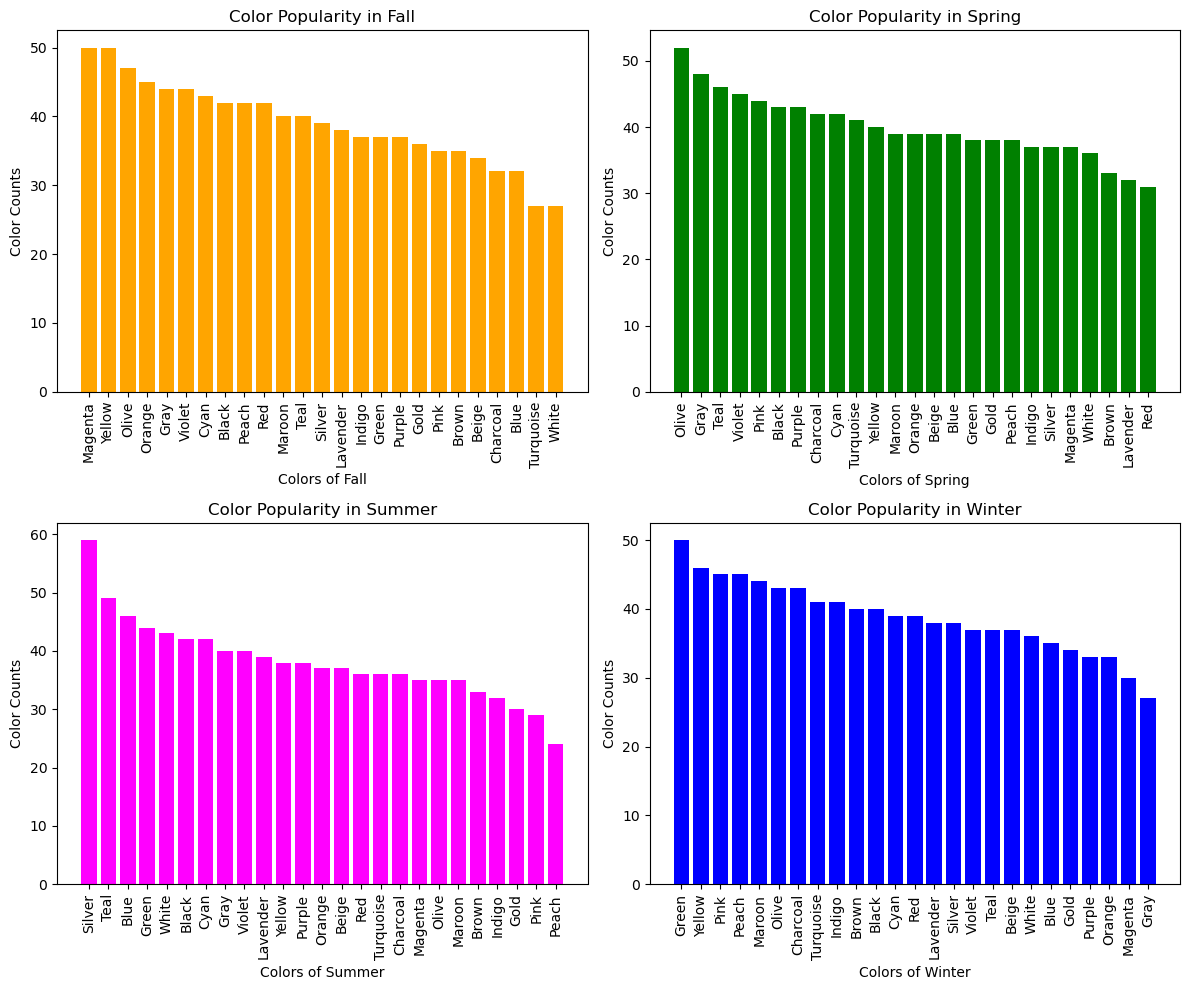

In [18]:
import matplotlib.pyplot as plt

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot bar chart for Fall
axs[0, 0].bar(fall_colors.index, fall_colors.values, color='orange')
axs[0, 0].set_title('Color Popularity in Fall')
axs[0, 0].set_xlabel('Colors of Fall')
axs[0, 0].set_ylabel('Color Counts')
axs[0, 0].tick_params(axis='x', rotation=90)

# Plot bar chart for Spring
axs[0, 1].bar(spring_colors.index, spring_colors.values, color='green')
axs[0, 1].set_title('Color Popularity in Spring')
axs[0, 1].set_xlabel('Colors of Spring')
axs[0, 1].set_ylabel('Color Counts')
axs[0, 1].tick_params(axis='x', rotation=90)

# Plot bar chart for Summer
axs[1, 0].bar(summer_colors.index, summer_colors.values, color='magenta')
axs[1, 0].set_title('Color Popularity in Summer')
axs[1, 0].set_xlabel('Colors of Summer')
axs[1, 0].set_ylabel('Color Counts')
axs[1, 0].tick_params(axis='x', rotation=90)

# Plot bar chart for Winter
axs[1, 1].bar(winter_colors.index, winter_colors.values, color='blue')
axs[1, 1].set_title('Color Popularity in Winter')
axs[1, 1].set_xlabel('Colors of Winter')
axs[1, 1].set_ylabel('Color Counts')
axs[1, 1].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


colors by popularity subplot

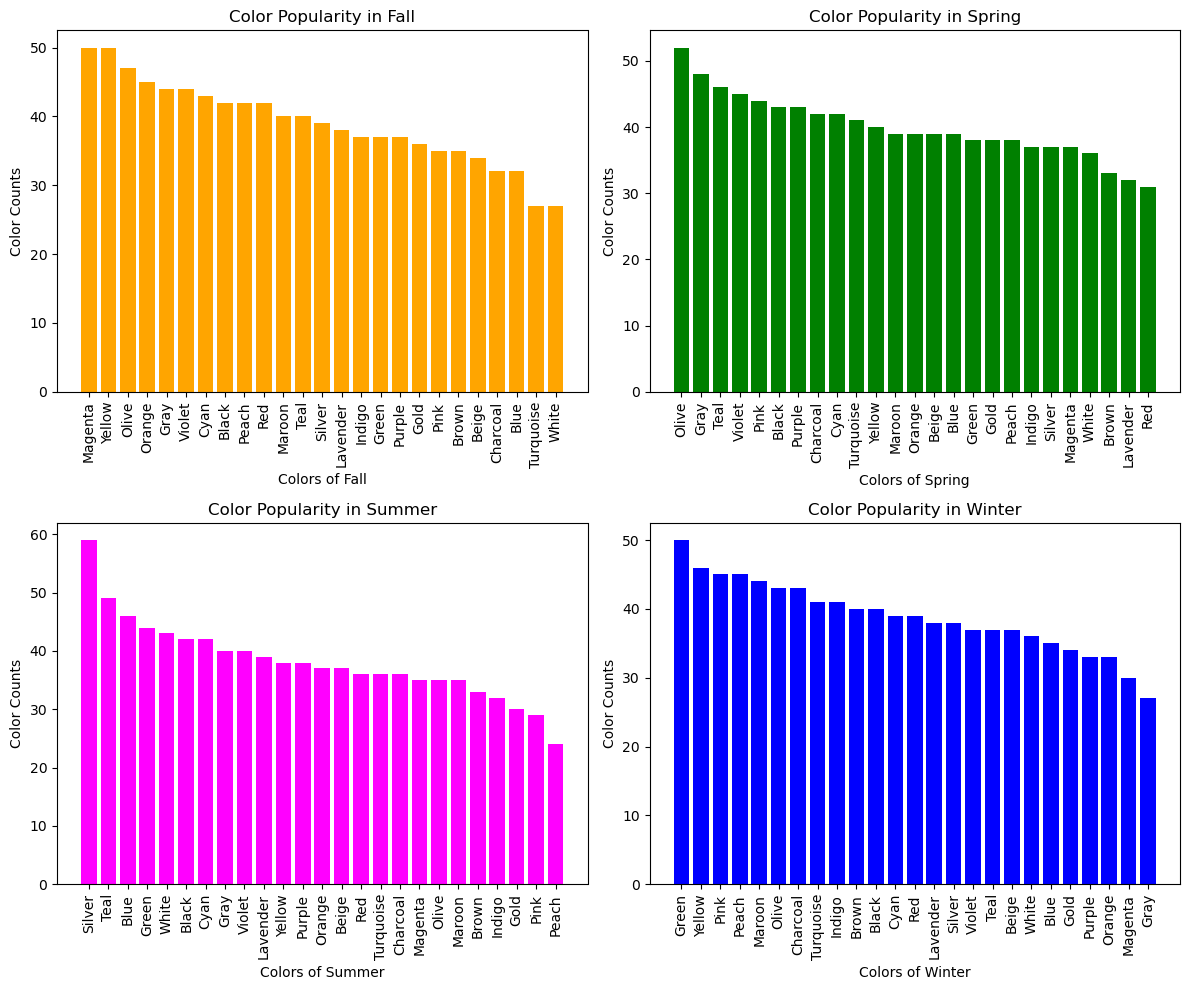

In [19]:
import matplotlib.pyplot as plt

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot bar chart for Fall
axs[0, 0].bar(fall_colors.index, fall_colors.values, color='orange')
axs[0, 0].set_title('Color Popularity in Fall')
axs[0, 0].set_xlabel('Colors of Fall')
axs[0, 0].set_ylabel('Color Counts')
axs[0, 0].tick_params(axis='x', rotation=90)

# Plot bar chart for Spring
axs[0, 1].bar(spring_colors.index, spring_colors.values, color='green')
axs[0, 1].set_title('Color Popularity in Spring')
axs[0, 1].set_xlabel('Colors of Spring')
axs[0, 1].set_ylabel('Color Counts')
axs[0, 1].tick_params(axis='x', rotation=90)

# Plot bar chart for Summer
axs[1, 0].bar(summer_colors.index, summer_colors.values, color='magenta')
axs[1, 0].set_title('Color Popularity in Summer')
axs[1, 0].set_xlabel('Colors of Summer')
axs[1, 0].set_ylabel('Color Counts')
axs[1, 0].tick_params(axis='x', rotation=90)

# Plot bar chart for Winter
axs[1, 1].bar(winter_colors.index, winter_colors.values, color='blue')
axs[1, 1].set_title('Color Popularity in Winter')
axs[1, 1].set_xlabel('Colors of Winter')
axs[1, 1].set_ylabel('Color Counts')
axs[1, 1].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


colors by popularity - alphabetical order subplot

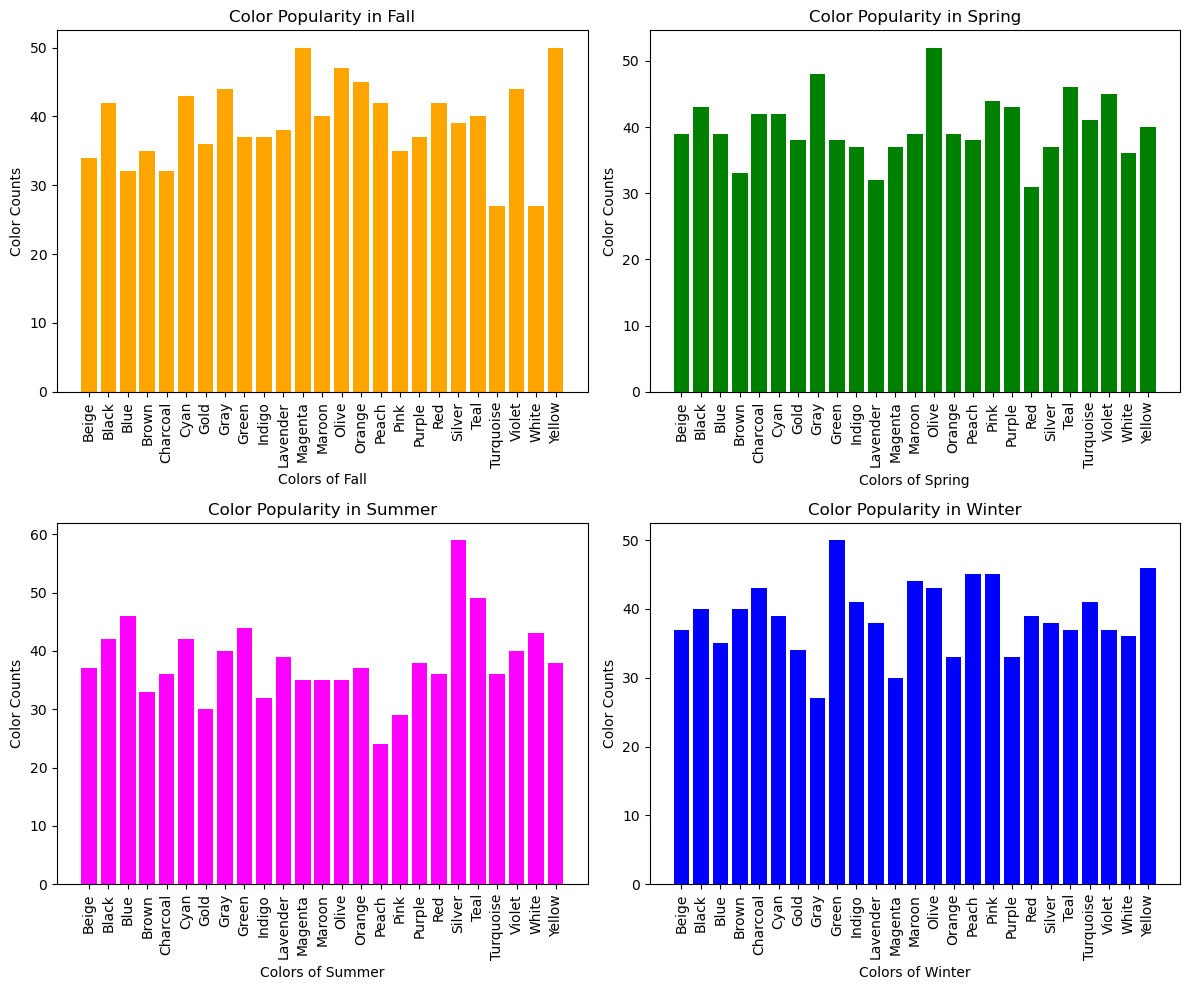

In [20]:
import matplotlib.pyplot as plt

# Assuming fall_colors, spring_colors, summer_colors, and winter_colors are Series with color counts

# Sort each Series alphabetically by index (color names)
fall_colors = fall_colors.sort_index()
spring_colors = spring_colors.sort_index()
summer_colors = summer_colors.sort_index()
winter_colors = winter_colors.sort_index()

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot bar chart for Fall
axs[0, 0].bar(fall_colors.index, fall_colors.values, color='orange')
axs[0, 0].set_title('Color Popularity in Fall')
axs[0, 0].set_xlabel('Colors of Fall')
axs[0, 0].set_ylabel('Color Counts')
axs[0, 0].tick_params(axis='x', rotation=90)

# Plot bar chart for Spring
axs[0, 1].bar(spring_colors.index, spring_colors.values, color='green')
axs[0, 1].set_title('Color Popularity in Spring')
axs[0, 1].set_xlabel('Colors of Spring')
axs[0, 1].set_ylabel('Color Counts')
axs[0, 1].tick_params(axis='x', rotation=90)

# Plot bar chart for Summer
axs[1, 0].bar(summer_colors.index, summer_colors.values, color='magenta')
axs[1, 0].set_title('Color Popularity in Summer')
axs[1, 0].set_xlabel('Colors of Summer')
axs[1, 0].set_ylabel('Color Counts')
axs[1, 0].tick_params(axis='x', rotation=90)

# Plot bar chart for Winter
axs[1, 1].bar(winter_colors.index, winter_colors.values, color='blue')
axs[1, 1].set_title('Color Popularity in Winter')
axs[1, 1].set_xlabel('Colors of Winter')
axs[1, 1].set_ylabel('Color Counts')
axs[1, 1].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


### Sorting by cateogry and season & item and season

In [21]:
df_ifall = df_fall[['Season', 'Item Purchased', 'Category']]
df_ispring = df_spring[['Season', 'Item Purchased', 'Category']]
df_isummer = df_summer[['Season', 'Item Purchased', 'Category']]
df_iwinter = df_winter[['Season', 'Item Purchased', 'Category']]

Category by Season

In [22]:
fall_cat = df_ifall['Category'].value_counts()
spring_cat = df_ispring['Category'].value_counts()
summer_cat = df_isummer['Category'].value_counts()
winter_cat = df_iwinter['Category'].value_counts()

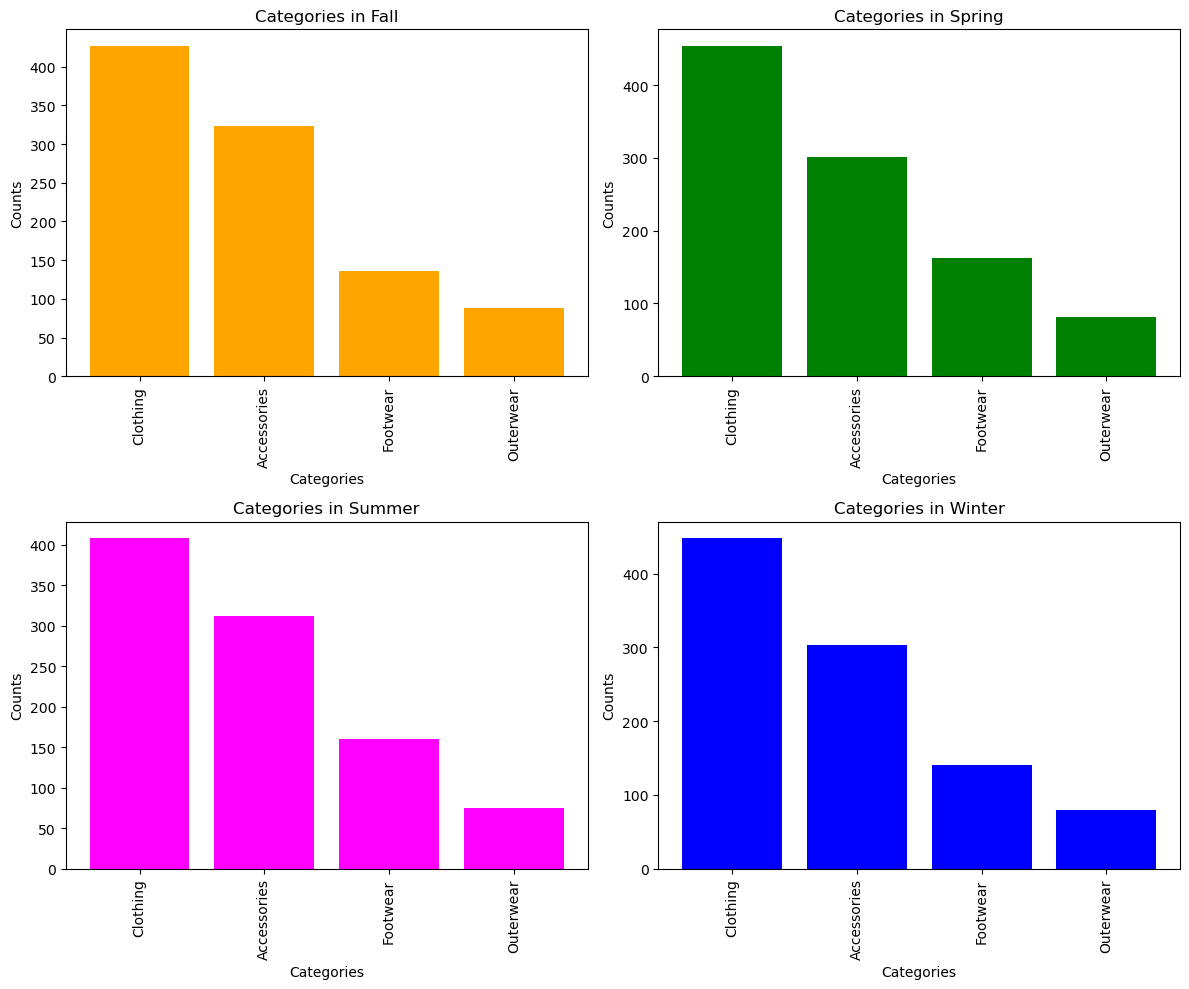

In [23]:
import matplotlib.pyplot as plt

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot bar chart for Fall
axs[0, 0].bar(fall_cat.index, fall_cat.values, color='orange')
axs[0, 0].set_title('Categories in Fall')
axs[0, 0].set_xlabel('Categories')
axs[0, 0].set_ylabel('Counts')
axs[0, 0].tick_params(axis='x', rotation=90)

# Plot bar chart for Spring
axs[0, 1].bar(spring_cat.index, spring_cat.values, color='green')
axs[0, 1].set_title('Categories in Spring')
axs[0, 1].set_xlabel('Categories')
axs[0, 1].set_ylabel('Counts')
axs[0, 1].tick_params(axis='x', rotation=90)

# Plot bar chart for Summer
axs[1, 0].bar(summer_cat.index, summer_cat.values, color='magenta')
axs[1, 0].set_title('Categories in Summer')
axs[1, 0].set_xlabel('Categories')
axs[1, 0].set_ylabel('Counts')
axs[1, 0].tick_params(axis='x', rotation=90)

# Plot bar chart for Winter
axs[1, 1].bar(winter_cat.index, winter_cat.values, color='blue')
axs[1, 1].set_title('Categories in Winter')
axs[1, 1].set_xlabel('Categories')
axs[1, 1].set_ylabel('Counts')
axs[1, 1].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


Item by Category by Season

In [24]:
df_cfall = df_ifall[df_ifall['Category']=='Clothing']
df_cspring = df_ispring[df_ispring['Category']=='Clothing']
df_csummer = df_isummer[df_isummer['Category']=='Clothing']
df_cwinter = df_iwinter[df_iwinter['Category']=='Clothing']

In [25]:
fall_it = df_cfall['Item Purchased'].value_counts()
spring_it = df_cspring['Item Purchased'].value_counts()
summer_it = df_csummer['Item Purchased'].value_counts()
winter_it = df_cwinter['Item Purchased'].value_counts()

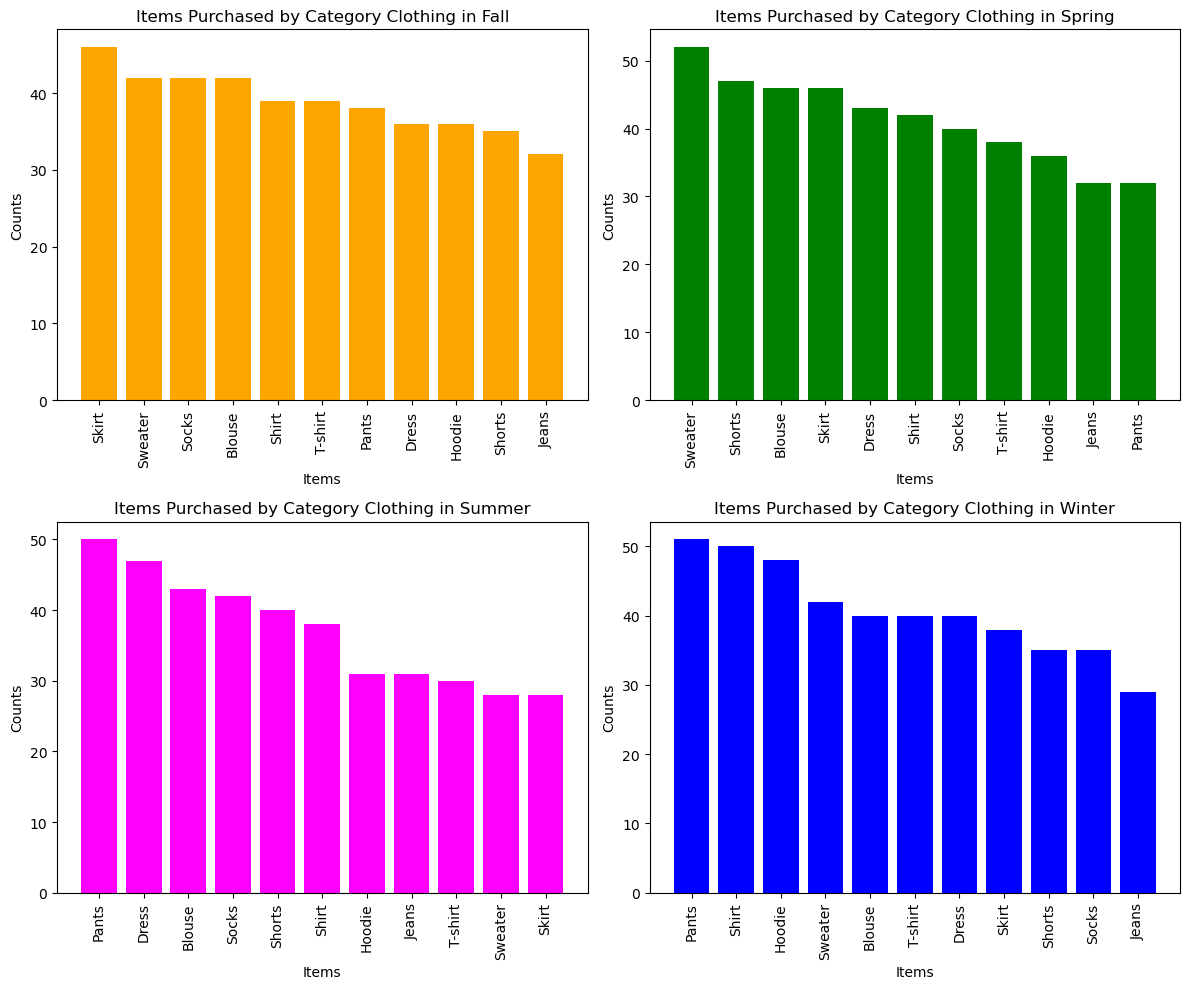

In [26]:
import matplotlib.pyplot as plt

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot bar chart for Fall
axs[0, 0].bar(fall_it.index, fall_it.values, color='orange')
axs[0, 0].set_title('Items Purchased by Category Clothing in Fall')
axs[0, 0].set_xlabel('Items')
axs[0, 0].set_ylabel('Counts')
axs[0, 0].tick_params(axis='x', rotation=90)

# Plot bar chart for Spring
axs[0, 1].bar(spring_it.index, spring_it.values, color='green')
axs[0, 1].set_title('Items Purchased by Category Clothing in Spring')
axs[0, 1].set_xlabel('Items')
axs[0, 1].set_ylabel('Counts')
axs[0, 1].tick_params(axis='x', rotation=90)

# Plot bar chart for Summer
axs[1, 0].bar(summer_it.index, summer_it.values, color='magenta')
axs[1, 0].set_title('Items Purchased by Category Clothing in Summer')
axs[1, 0].set_xlabel('Items')
axs[1, 0].set_ylabel('Counts')
axs[1, 0].tick_params(axis='x', rotation=90)

# Plot bar chart for Winter
axs[1, 1].bar(winter_it.index, winter_it.values, color='blue')
axs[1, 1].set_title('Items Purchased by Category Clothing in Winter')
axs[1, 1].set_xlabel('Items')
axs[1, 1].set_ylabel('Counts')
axs[1, 1].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


### Money Spent  & Discounts Applied by Season

Money Spent

In [27]:
money_spent = shopping_df[['Season', 'Purchase Amount (USD)', 'Discount Applied']]

In [28]:
money_spent_s = money_spent.groupby('Season')['Purchase Amount (USD)'].sum()

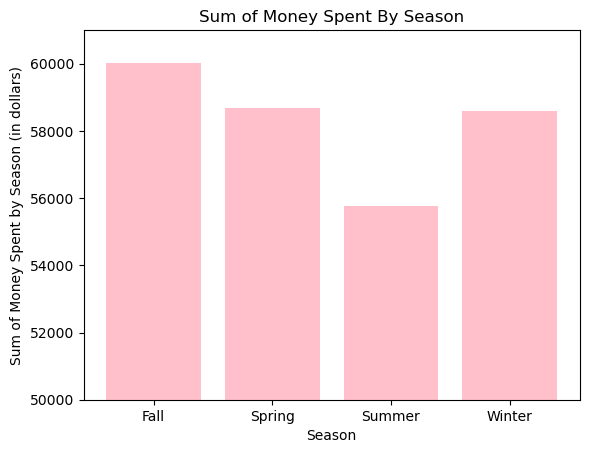

In [29]:
plt.bar(money_spent_s.index, money_spent_s.values, color='pink', bottom=None, align='center', data=None)
plt.title('Sum of Money Spent By Season')
plt.xlabel('Season')
plt.ylabel('Sum of Money Spent by Season (in dollars)')
plt.ylim(50000, 61000)
plt.show()

In [30]:
n = money_spent['Discount Applied'].value_counts()
n

Discount Applied
No     2223
Yes    1677
Name: count, dtype: int64

In [32]:
money_spent_d = money_spent.groupby(['Season', 'Discount Applied']).size()
money_spent_d_unstacked = money_spent_d.unstack()

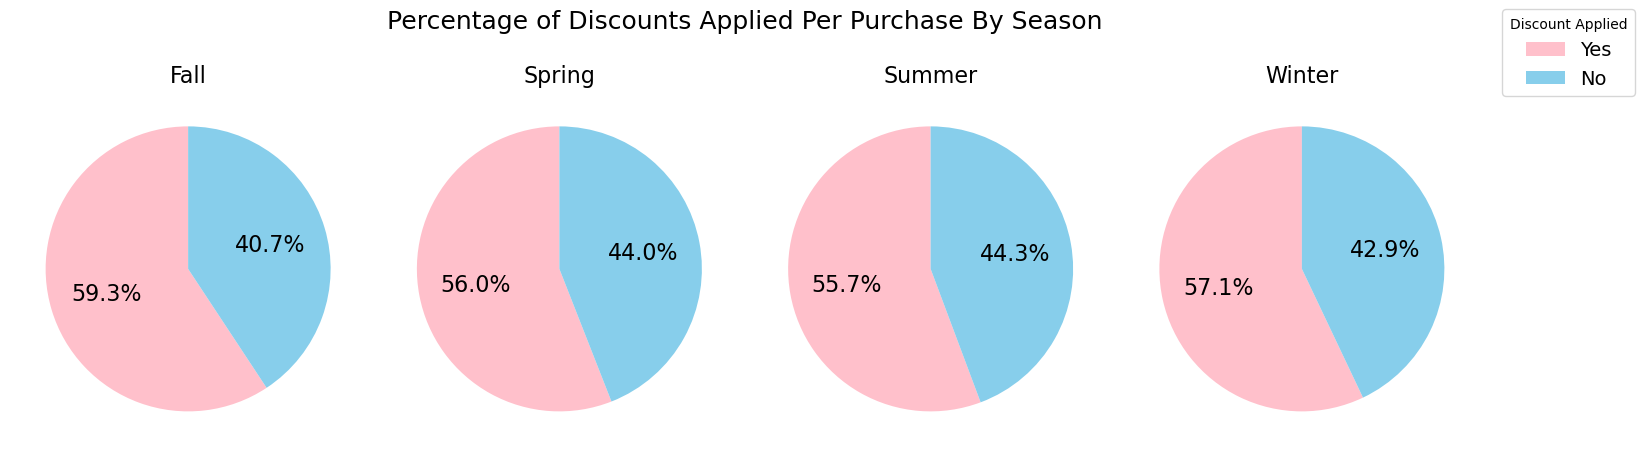

In [33]:
import matplotlib.pyplot as plt

# Create subplots for pie charts, one for each season
seasons = money_spent_d_unstacked.index
fig, axes = plt.subplots(1, len(seasons), figsize=(15, 5))

# Generate a pie chart for each season
for i, season in enumerate(seasons):
    # Get the yes/no counts for the current season
    data = money_spent_d_unstacked.loc[season]
    # Plot pie chart
    #axes[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=)
    wedges, texts, autotexts = axes[i].pie(data, autopct='%1.1f%%', startangle=90, colors=['pink','skyblue'], textprops={'fontsize': 16})
    axes[i].set_title(f"{season}", fontsize=16)
fig.legend(wedges, ['Yes', 'No'], loc='upper right', bbox_to_anchor=(1.1, 1), title="Discount Applied", fontsize=14)
fig.suptitle('Percentage of Discounts Applied Per Purchase By Season', fontsize=18)
# Adjust layout
plt.tight_layout()
plt.show()

In [34]:
purchase_amount_by_discount = money_spent.groupby(['Season'])['Purchase Amount (USD)'].sum()
purchase_amount_by_discount

Season
Fall      60018
Spring    58679
Summer    55777
Winter    58607
Name: Purchase Amount (USD), dtype: int64

In [35]:
purchase_amount_by_discount = money_spent.groupby(['Season', 'Discount Applied'])['Purchase Amount (USD)'].sum().unstack()
purchase_amount_by_discount

Discount Applied,No,Yes
Season,,
Fall,35566,24452
Spring,33079,25600
Summer,31726,24051
Winter,33299,25308


### discount applied(y/n) / total spent

#### Fall 
  -  No: 
        35566/60018 = 59.3%
  -  Yes:
        24452/60018 = 40.7%
   > Difference: 59.3 - 40.7 = 18.6
#### Spring
  -  No:
        33079/58679 = 56.4%
  -  Yes:
        25600/58679 = 43.6%
   > Difference: 56.4 - 43.6 = 12.8
#### Summer
  -  No:
        31726/55777 = 56.9%
  -  Yes:
        24051/55777 = 43.1%
   > Difference: 56.9 - 43.1 = 13.8
#### Winter
  -  No:
        33299/58607 = 56.8%
  -  Yes:
        25308/58607 = 43.2%
   > Difference: 56.8 - 43.2 = 13.6

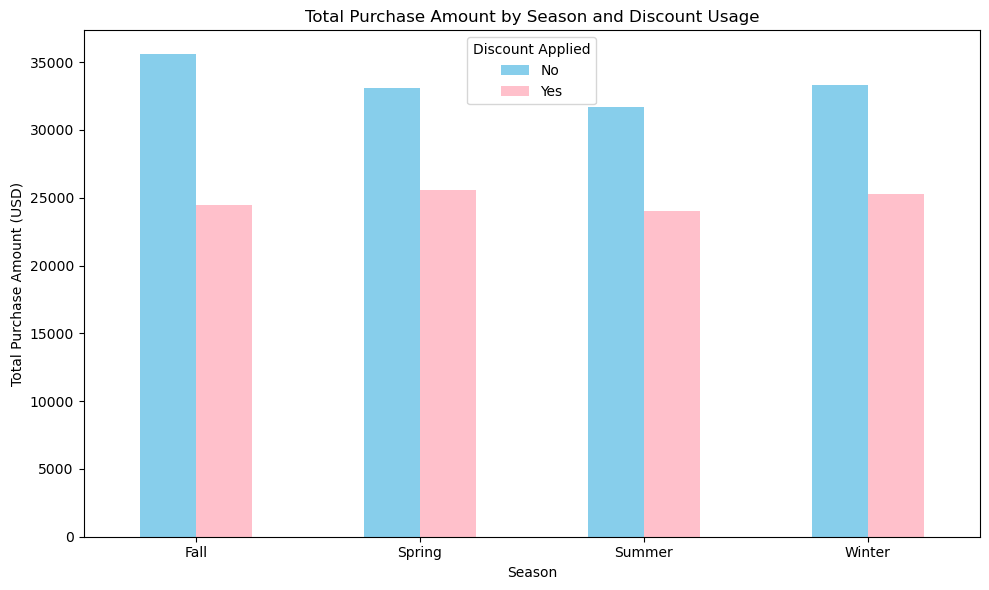

In [36]:
import matplotlib.pyplot as plt

# Plot the bar chart
purchase_amount_by_discount.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'pink'])
plt.xticks(rotation=360)

# Add labels and title
plt.title('Total Purchase Amount by Season and Discount Usage')
plt.xlabel('Season')
plt.ylabel('Total Purchase Amount (USD)')

# Add a legend to explain the colors for 'Yes' and 'No'
plt.legend(title="Discount Applied", labels=['No', 'Yes'])

# Show the plot
plt.tight_layout()
plt.show()
